Import Libraries and choose style(s) for our future plots.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

Step 0: Import and Read Data

In [123]:
df_reg = pd.read_csv(r'C:\Users\Kerin B\Desktop\Datasets\nba_regular_2223.csv', delimiter=',')

Step 1: Understanding Our Data
- Dataframe shape
- head and tail of data
- dtypes

In [124]:
df_reg.shape

(679, 30)

In [125]:
df_reg.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [126]:
df_reg.tail(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5
678,539,Ivica Zubac,C,25,LAC,76,76,28.6,4.3,6.8,...,0.697,3.1,6.8,9.9,1.0,0.4,1.3,1.5,2.9,10.8


In [127]:
df_reg.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [128]:
df_reg.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

Step 2: Data Preparation and Cleaning
- checking for and removing duplicates
- removing unneeded/unnecessary columns

In [129]:
counts = df_reg['Player'].value_counts()
players_to_drop = counts[counts > 1].index
total = 'TOT'
(players_to_drop)

Index(['Dorian Finney-Smith', 'Thomas Bryant', 'Spencer Dinwiddie',
       'Moses Brown', 'Eugene Omoruyi', 'Cameron Johnson', 'Dario Šarić',
       'Mikal Bridges', 'R.J. Hampton', 'Goran Dragić', 'Matt Ryan',
       'Damian Jones', 'Jamaree Bouyea', 'D'Angelo Russell', 'Jalen McDaniels',
       'Gary Payton II', 'Kevin Durant', 'Terrence Ross', 'Rui Hachimura',
       'Jarred Vanderbilt', 'Reggie Jackson', 'Goga Bitadze', 'Josh Hart',
       'Justin Holiday', 'Mike Conley', 'Dru Smith', 'Svi Mykhailiuk',
       'Mike Muscala', 'Nerlens Noel', 'Terry Taylor', 'Markieff Morris',
       'Justin Champagnie', 'Julian Champagnie', 'Bones Hyland',
       'Kendrick Nunn', 'Jordan Nwora', 'Dewayne Dedmon', 'Matisse Thybulle',
       'Kyrie Irving', 'Juan Toscano-Anderson', 'Russell Westbrook',
       'T.J. Warren', 'Kessler Edwards', 'Kevin Knox',
       'Nickeil Alexander-Walker', 'Saben Lee', 'Eric Gordon', 'A.J. Lawson',
       'Devonte' Graham', 'Cam Reddish', 'James Wiseman', 'Kevin Love

In [130]:
filtered_df = df_reg[~(df_reg['Player'].isin(players_to_drop) & (df_reg['Tm'] != total))]
filtered_df.shape

(539, 30)

In [131]:
number_of_players = filtered_df['Player'].value_counts().sum()
unique_players = df_reg['Player'].nunique()
print('Number of Entries:', number_of_players, '-- Number of Unique Players:', unique_players)

Number of Entries: 539 -- Number of Unique Players: 539


In [132]:
duplicates_mask = filtered_df['Player'].duplicated()
duplicates_df = filtered_df[duplicates_mask]
print("Duplicate Rows:")
(duplicates_df)

Duplicate Rows:


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [133]:
filtered_df_new = filtered_df.drop(['Rk', 'Age', 'Tm', 'GS'], axis=1)

In [134]:
filtered_df_new.set_index('Player', inplace = True)

Step 3: Creating New Columns
- MVP Eligibility based on Games Played and Average Minutes Played
- Drop Rows of Players who are not MVP Eligible

In [135]:
criteria1 = 65
criteria2 = 20
filtered_df_new['MVP Eligibility'] = np.where((filtered_df_new['G'] >= criteria1) & (filtered_df_new['MP'] >= criteria2), 'Yes', 'No')

In [136]:
df_reg_new = filtered_df_new[filtered_df_new['MVP Eligibility'] != 'No']

In [145]:
df_reg_new.head(5)

(149, 26)

Step 4: Feature Relationships

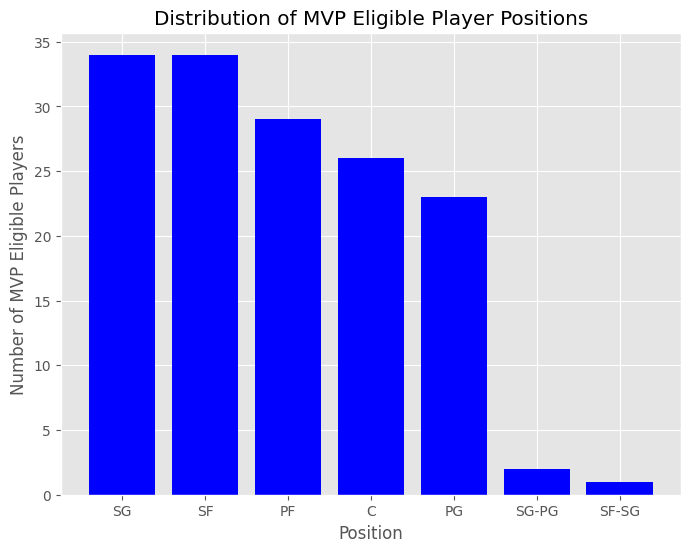

In [150]:
position_counts = exploded_positions['Pos'].value_counts()

plt.figure(figsize = (8,6))
plt.bar(position_counts.index, position_counts.values, color = 'blue')

plt.xlabel('Position')
plt.ylabel('Number of MVP Eligible Players')
plt.title('Distribution of MVP Eligible Player Positions')
plt.show()


<Axes: title={'center': 'Top 10 Scorers'}, xlabel='Player', ylabel='Points Per Game'>

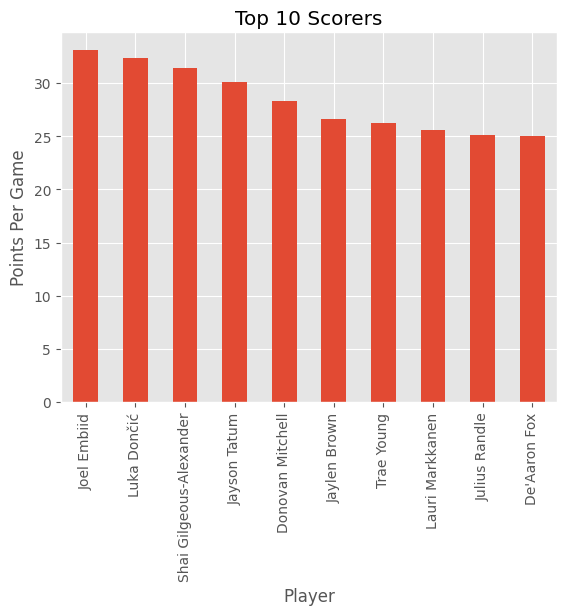

In [138]:
df_reg_top = df_reg_new.sort_values(by = 'PTS', ascending=False).head(10)
df_reg_top['PTS'].plot(kind='bar', title='Top 10 Scorers', xlabel = 'Player', ylabel = 'Points Per Game')

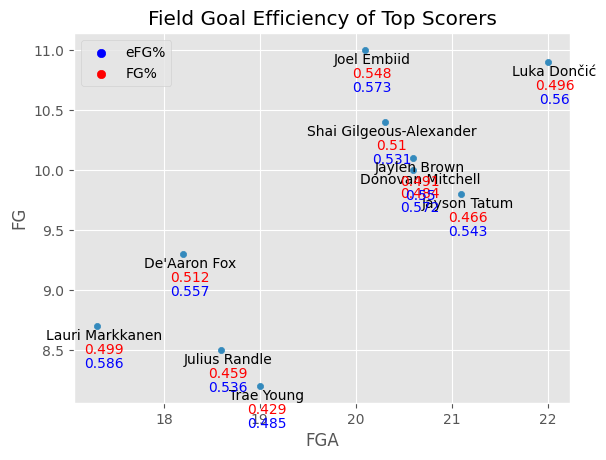

,PTS,FG,FGA,FG%,eFG%
Player,,,,,
Joel Embiid,33.1,11.0,20.1,0.548,0.573
Luka Dončić,32.4,10.9,22.0,0.496,0.560
Shai Gilgeous-Alexander,31.4,10.4,20.3,0.510,0.531
Jayson Tatum,30.1,9.8,21.1,0.466,0.543
Donovan Mitchell,28.3,10.0,20.6,0.484,0.572
Jaylen Brown,26.6,10.1,20.6,0.491,0.550
Trae Young,26.2,8.2,19.0,0.429,0.485
Lauri Markkanen,25.6,8.7,17.3,0.499,0.586
Julius Randle,25.1,8.5,18.6,0.459,0.536


In [139]:
pointsfg = ['PTS','FG', 'FGA', 'FG%', 'eFG%']

ax = df_reg_top.plot(kind = 'scatter', title = 'Field Goal Efficiency of Top Scorers', x = 'FGA', y = 'FG')
for i, row in df_reg_top.iterrows():
    ax.annotate(row.name, (row['FGA'], row['FG']), textcoords="offset points", xytext=(5, -10), ha='center')
    ax.annotate(row['FG%'], (row['FGA'], row['FG']), textcoords="offset points", xytext=(5, -20), ha='center', color = 'red')
    ax.annotate(row['eFG%'], (row['FGA'], row['FG']), textcoords="offset points", xytext=(5, -30), ha='center', color = 'blue')

ax.scatter([], [], marker='o', label='eFG%', color='blue', alpha=1)
ax.scatter([], [], marker='o', label='FG%', color='red', alpha=1)

ax.legend()

plt.show()
df_reg_top[pointsfg]


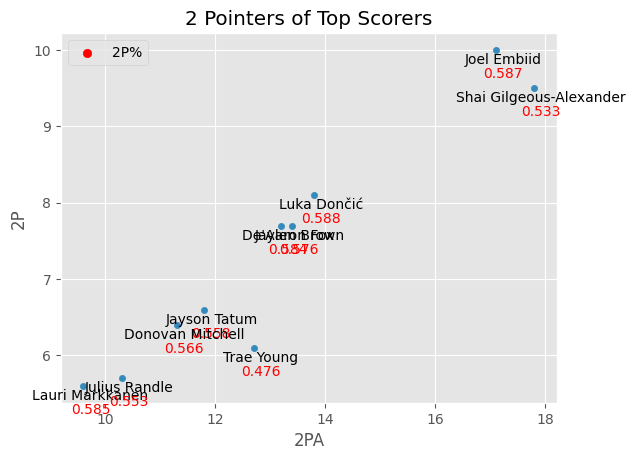

,PTS,2P,2PA,2P%
Player,,,,
Joel Embiid,33.1,10.0,17.1,0.587
Luka Dončić,32.4,8.1,13.8,0.588
Shai Gilgeous-Alexander,31.4,9.5,17.8,0.533
Jayson Tatum,30.1,6.6,11.8,0.558
Donovan Mitchell,28.3,6.4,11.3,0.566
Jaylen Brown,26.6,7.7,13.4,0.576
Trae Young,26.2,6.1,12.7,0.476
Lauri Markkanen,25.6,5.6,9.6,0.585
Julius Randle,25.1,5.7,10.3,0.553


In [140]:
points2 = ['PTS','2P', '2PA', '2P%']

ax = df_reg_top.plot(kind = 'scatter', title = '2 Pointers of Top Scorers', x = '2PA', y = '2P')
for i, row in df_reg_top.iterrows():
    ax.annotate(row.name, (row['2PA'], row['2P']), textcoords="offset points", xytext=(5, -10), ha='center')
    ax.annotate(row['2P%'], (row['2PA'], row['2P']), textcoords="offset points", xytext=(5, -20), ha='center', color = 'red')

ax.scatter([], [], marker='o', label='2P%', color='red', alpha=1)

ax.legend()

plt.show()
df_reg_top[points2]


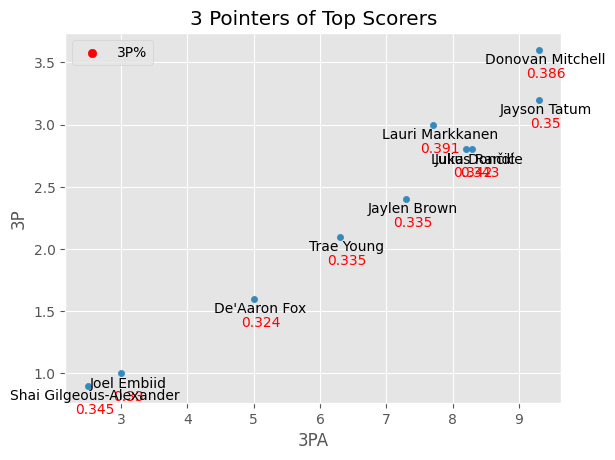

,PTS,3P,3PA,3P%
Player,,,,
Joel Embiid,33.1,1.0,3.0,0.330
Luka Dončić,32.4,2.8,8.2,0.342
Shai Gilgeous-Alexander,31.4,0.9,2.5,0.345
Jayson Tatum,30.1,3.2,9.3,0.350
Donovan Mitchell,28.3,3.6,9.3,0.386
Jaylen Brown,26.6,2.4,7.3,0.335
Trae Young,26.2,2.1,6.3,0.335
Lauri Markkanen,25.6,3.0,7.7,0.391
Julius Randle,25.1,2.8,8.3,0.343


In [141]:
points3 = ['PTS','3P', '3PA', '3P%']

ax = df_reg_top.plot(kind = 'scatter', title = '3 Pointers of Top Scorers', x = '3PA', y = '3P')
for i, row in df_reg_top.iterrows():
    ax.annotate(row.name, (row['3PA'], row['3P']), textcoords="offset points", xytext=(5, -10), ha='center')
    ax.annotate(row['3P%'], (row['3PA'], row['3P']), textcoords="offset points", xytext=(5, -20), ha='center', color = 'red')

ax.scatter([], [], marker='o', label='3P%', color='red', alpha=1)

ax.legend()

plt.show()
df_reg_top[points3]


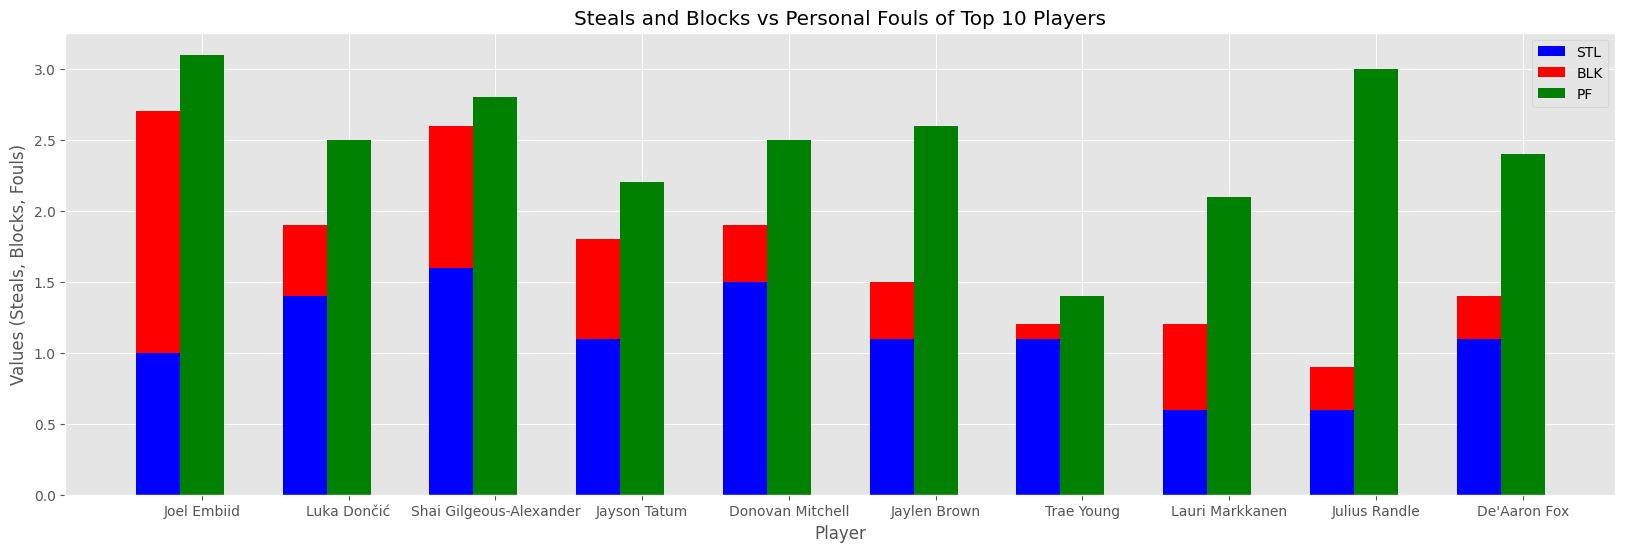

,PTS,STL,BLK,PF
Player,,,,
Joel Embiid,33.1,1.0,1.7,3.1
Luka Dončić,32.4,1.4,0.5,2.5
Shai Gilgeous-Alexander,31.4,1.6,1.0,2.8
Jayson Tatum,30.1,1.1,0.7,2.2
Donovan Mitchell,28.3,1.5,0.4,2.5
Jaylen Brown,26.6,1.1,0.4,2.6
Trae Young,26.2,1.1,0.1,1.4
Lauri Markkanen,25.6,0.6,0.6,2.1
Julius Randle,25.1,0.6,0.3,3.0


In [142]:
points_STL_BLK_PF = ['PTS', 'STL', 'BLK', 'PF']

ind = np.arange(len(df_reg_top))
width = 0.3
plt.figure(figsize=(20, 6))
plt.bar(ind - width, df_reg_top['STL'], width, label='STL', color='blue')
plt.bar(ind - width, df_reg_top['BLK'], width, label='BLK', color='red', bottom=df_reg_top['STL'])
plt.bar(ind, df_reg_top['PF'], width, label='PF', color='green')

plt.xlabel('Player')
plt.ylabel('Values (Steals, Blocks, Fouls)')
plt.title('Steals and Blocks vs Personal Fouls of Top 10 Players')
plt.xticks(ind, df_reg_top.index)  # Set x-axis labels
plt.legend()
plt.show()

df_reg_top[points_STL_BLK_PF]

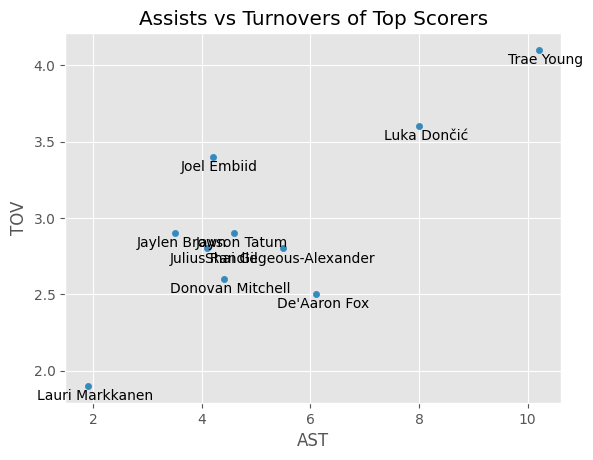

,PTS,AST,TOV
Player,,,
Joel Embiid,33.1,4.2,3.4
Luka Dončić,32.4,8.0,3.6
Shai Gilgeous-Alexander,31.4,5.5,2.8
Jayson Tatum,30.1,4.6,2.9
Donovan Mitchell,28.3,4.4,2.6
Jaylen Brown,26.6,3.5,2.9
Trae Young,26.2,10.2,4.1
Lauri Markkanen,25.6,1.9,1.9
Julius Randle,25.1,4.1,2.8


In [144]:
points_tov_ast = ['PTS', 'AST', 'TOV']

ax = df_reg_top.plot(kind = 'scatter', title = 'Assists vs Turnovers of Top Scorers', x = 'AST', y = 'TOV')
for i, row in df_reg_top.iterrows():
    ax.annotate(row.name, (row['AST'], row['TOV']), textcoords="offset points", xytext=(5, -10), ha='center')

plt.show()
df_reg_top[points_tov_ast]
